In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torchvision
import cv2
import os
from scipy.io import loadmat

# Load the data from the folder
We use CV2 to load the images.

In [2]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
    return images

In [ ]:
images = load_images_from_folder('/Users/madsandersen/Desktop/PVELAD/trainval/JPEGImages')

In [19]:
#path to the desktop is: /Users/madsandersen/Desktop
os.listdir('/Users/madsandersen/Desktop/PVELAD/trainval/JPEGImages')

['img023169.jpg',
 'img000968.jpg',
 'img002819.jpg',
 'img002831.jpg',
 'img003291.jpg',
 'img001486.jpg',
 'img000940.jpg',
 'img000798.jpg',
 'img001492.jpg',
 'img000954.jpg',
 'img003285.jpg',
 'img023155.jpg',
 'img002825.jpg',
 'img000001.jpg',
 'img003508.jpg',
 'img002616.jpg',
 'img002170.jpg',
 'img021971.jpg',
 'img000767.jpg',
 'img001479.jpg',
 'img021965.jpg',
 'img000773.jpg',
 'img002164.jpg',
 'img002602.jpg',
 'img000015.jpg',
 'img003534.jpg',
 'img001323.jpg',
 'img001445.jpg',
 'img000983.jpg',
 'img003252.jpg',
 'img023182.jpg',
 'img002158.jpg',
 'img003246.jpg',
 'img023196.jpg',
 'img021959.jpg',
 'img001451.jpg',
 'img000997.jpg',
 'img001337.jpg',
 'img000029.jpg',
 'img003520.jpg',
 'img001860.jpg',
 'img022707.jpg',
 'img022713.jpg',
 'img001874.jpg',
 'img001684.jpg',
 'img023343.jpg',
 'img003093.jpg',
 'img021232.jpg',
 'img021226.jpg',
 'img002399.jpg',
 'img023357.jpg',
 'img003087.jpg',
 'img001848.jpg',
 'img001690.jpg',
 'img000565.jpg',
 'img00237

#Actualy lets load them on the fly so we don't take up all the ram

In [22]:
# Make a costum dataset with torch
class PVELAD(torch.utils.data.Dataset):
    def __init__(self, root, transform=None):
        self.root = root
        self.transform = transform
        self.imgs = list(sorted(os.listdir(os.path.join(root, "JPEGImages"))))
        self.labels = list(sorted(os.listdir(os.path.join(root, "Annotations"))))

    def __getitem__(self, idx):
        # load images ad masks
        img_path = os.path.join(self.root, "JPEGImages", self.imgs[idx])
        labels_path = os.path.join(self.root, "Annotations", self.labels[idx])
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        labels = pd.read_xml(labels_path)
        # apply transforms
        if self.transform is not None:
            img = self.transform(img)
            labels = self.transform(labels)
        return img, labels

    def __len__(self):
        return len(self.imgs)



In [23]:
data = PVELAD('/Users/madsandersen/Desktop/PVELAD/trainval')

In [28]:
data[50][1]

,folder,filename,database,width,height,depth,segmented,name,pose,truncated,difficult,bndbox
0,finger,None,None,NaN,NaN,NaN,NaN,None,None,NaN,NaN,NaN
1,None,img000051.jpg,None,NaN,NaN,NaN,NaN,None,None,NaN,NaN,NaN
2,None,None,Unknown,NaN,NaN,NaN,NaN,None,None,NaN,NaN,NaN
3,None,None,None,1024.0,1024.0,1.0,NaN,None,None,NaN,NaN,NaN
4,None,None,None,NaN,NaN,NaN,0.0,None,None,NaN,NaN,NaN
5,None,None,None,NaN,NaN,NaN,NaN,finger,Unspecified,0.0,0.0,NaN
6,None,None,None,NaN,NaN,NaN,NaN,finger,Unspecified,0.0,0.0,NaN
7,None,None,None,NaN,NaN,NaN,NaN,finger,Unspecified,0.0,0.0,NaN
8,None,None,None,NaN,NaN,NaN,NaN,finger,Unspecified,0.0,0.0,NaN
9,None,None,None,NaN,NaN,NaN,NaN,finger,Unspecified,0.0,0.0,NaN


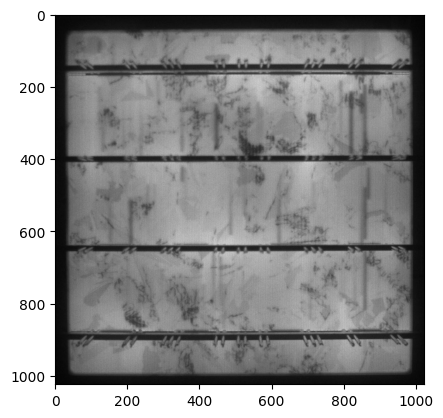

In [27]:
plt.imshow(data[50][0])

## Dataset from Claire

In [83]:
from scipy.io import loadmat
data_set = loadmat("Data/Serie1_raw_14Feb/MaskGT/GT_Serie_1_Image_-1_4085_Cell_Row2_Col_2.mat")

In [11]:
data_set

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Tue Feb 14 05:55:34 2023',
 '__version__': '1.0',
 '__globals__': [],
 'GTLabel': array([[array(['Finger Failure'], dtype='<U14')]], dtype=object),
 'GTMask': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}

In [96]:
# Write a coustum dataset for the data from Claire
class DTU_Dataset(torch.utils.data.Dataset):
    def __init__(self, img_root,MaskGT, transform=None):
        self.img_root = img_root
        self.MaskGT = MaskGT
        self.transform = transform
        self.imgs = list(sorted(os.listdir(os.path.join(img_root))))
        self.labels = list(sorted(os.listdir(os.path.join(MaskGT))))

    def __getitem__(self, idx):
        # load images ad masks
        img_path = os.path.join(self.img_root, self.imgs[idx])
        labels_path = os.path.join(self.MaskGT, 'GT_Serie_1_Image_-'+self.imgs[idx][17:-4]+'.mat')
        #print(img_path, labels_path)


        #Read the image with CV2
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        #Load the labels from the .mat file
        try:
            gt = loadmat(labels_path)
            print(len(gt['GTLabel']))
             # Set GTlabel
            category = gt['GTLabel'][0]
             # Set the mask
            mask = gt['GTMask']
        except FileNotFoundError:
            category = 'No Defect'
            mask = np.zeros((img.shape[0],img.shape[1]))

        # apply transforms
        if self.transform is not None:
            img = self.transform(img)

        return img, category,mask

    def __len__(self):
        return len(self.imgs)

In [97]:
data = DTU_Dataset(img_root = 'Data/Serie1_raw_14Feb/CellsGS', MaskGT = 'Data/Serie1_raw_14Feb/MaskGT')

In [88]:
img,label,mask = data[1]

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Tue Feb 14 00:14:48 2023', '__version__': '1.0', '__globals__': [], 'GTLabel': array([[array(['Finger Failure'], dtype='<U14')]], dtype=object), 'GTMask': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}


In [ ]:
fig,ax = plt.subplots(3,3,figsize=(10,10))
alpha = 0.2
# plot a 3x3 grid of images
for i in range(3):
    for j in range(3):
        #plot the image
        ax[i,j].imshow(data[i*3+j][0])
        #print(data[i*3+j][0].shape)

        #overlay the mask
        if len(data[i*3+j][2].shape) > 2:
            for k in range(data[i*3+j][2].shape[2]):
                ax[i,j].imshow(data[i*3+j][2][:,:,k],alpha=alpha)
        else:
            ax[i,j].imshow(data[i*3+j][2],alpha=alpha)

        #print(data[i*3+j][2].shape)

        #Set title and format
        ax[i,j].set_title(data[i*3+j][1])
        ax[i,j].axis('off')
plt.show()


1
1
1
1
1
1
1
1
2
2
2
2
2
2
1
1
1
1


In [1]:
#cv2.imread(f'Serie_1_ImageGS_-{imagename}.png')
s = 'GT_Serie_1_Image_-1_4085_Cell_Row2_Col_2.mat'

In [4]:
s[18:-4]

'1_4085_Cell_Row2_Col_2'

In [5]:
f'Serie_1_ImagesGS_{s[18:-4]}.png'

'Serie_1_ImagesGS_1_4085_Cell_Row2_Col_2.png'

In [45]:
class DTU_Dataset_Defects(torch.utils.data.Dataset):
    def __init__(self, img_root,MaskGT, transform=None):
        self.img_root = img_root
        self.MaskGT = MaskGT
        self.transform = transform
        self.imgs = list(sorted(os.listdir(os.path.join(img_root))))
        self.labels = list(sorted(os.listdir(os.path.join(MaskGT))))

    def __getitem__(self, idx):
        # load images which are found in the MaskGT folder
        lbl = self.labels[idx]
        print(lbl)
        img_name = f'Serie_1_ImagesGS_{lbl[17:-4]}.png'
        img_path = os.path.join(self.img_root, img_name)
        labels_path = os.path.join(self.MaskGT, lbl)
        print(labels_path+'\n'+img_path)

        #Read the image with CV2
        img = cv2.imread(img_path)
        #img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        #Load the labels from the .mat file

        gt = loadmat(labels_path)
        # Set GTlabel
        category = gt['GTLabel'][0]
        # Set the mask
        mask = gt['GTMask']

    def __len__(self):
        return len(self.labels)

In [46]:
ds = DTU_Dataset_Defects(img_root = '/Users/madsandersen/PycharmProjects/BscProjektData/BachelorProject/Data/Serie1_raw_14Feb/CellsGS',
                         MaskGT = '/Users/madsandersen/PycharmProjects/BscProjektData/BachelorProject/Data/Serie1_raw_14Feb/MaskGT')

In [23]:
os.getcwd()

'/Users/madsandersen/PycharmProjects/BscProjektData'

In [47]:
ds[0]

GT_Serie_1_Image_-10_4081_Cell_Row10_Col_2.mat
/Users/madsandersen/PycharmProjects/BscProjektData/BachelorProject/Data/Serie1_raw_14Feb/MaskGT/GT_Serie_1_Image_-10_4081_Cell_Row10_Col_2.mat
/Users/madsandersen/PycharmProjects/BscProjektData/BachelorProject/Data/Serie1_raw_14Feb/CellsGS/Serie_1_ImagesGS_-10_4081_Cell_Row10_Col_2.png


[ WARN:0@1676.046] global loadsave.cpp:244 findDecoder imread_('/Users/madsandersen/PycharmProjects/BscProjektData/BachelorProject/Data/Serie1_raw_14Feb/CellsGS/Serie_1_ImagesGS_-10_4081_Cell_Row10_Col_2.png'): can't open/read file: check file path/integrity


In [43]:
im = cv2.imread('/Users/madsandersen/PycharmProjects/BscProjektData/BachelorProject/Data/Serie1_raw_14Feb/CellsGS/Serie_1_ImageGS_-1_4085_Cell_Row1_Col_1.png')

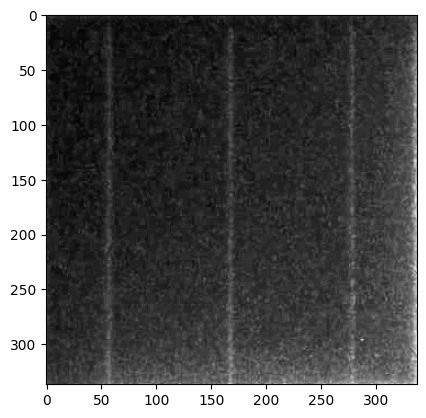

In [44]:
plt.imshow(im)